In [34]:
from ipfn import ipfn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

In [35]:
# Define age bins and corresponding categories
#bins = [0., 25., 50., 75., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 450., 500., 80000.]
#cats = ['Under 25,000 DKK', '25,000 - 49,999 DKK', '50,000 - 74,999 DKK',
#       '75,000 - 99,999 DKK', '100,000 - 124,999 DKK',
#       '125,000 - 149,999 DKK', '150,000 - 174,999 DKK',
#       '175,000 - 199,999 DKK', '200,000 - 224,999 DKK',
#       '225,000 - 249,999 DKK', '250,000 - 299,999 DKK',
#       '300,000 - 349,999 DKK', '350,000 - 399,999 DKK',
#       '400,000 - 449,999 DKK', '450,000 - 499,999 DKK',
#       '500,000 DKK and more']

# Create a categorical variable 'AgeGroup' based on 'RespAgeCorrect' using the specified bins and labels
#samp_df['IncRespondent2000'] = pd.cut(samp_df['IncRespondent2000'], bins, labels=cats, right=False, include_lowest=True)


In [36]:
#df_dtypes = {'IncRespondent2000' : 'int32',  'Sector' : 'category', 
 #            'DiaryMonth' : 'category', 'DiaryWeekday' : 'category', 'Handicap': 'category', 
  #           'MunicipalityOrigin': 'category', 'MunicipalityDest': 'category', 'AgeGroup': 'category', 
   #          'edu': 'category', 'RespEdulevel': 'category', 'RespHasBicycle': 'category', 
    #         'ResphasDrivlic': 'category', 'RespPrimOcc': 'category', 'Gender': 'category', 'WorkHourType': 'category', 
     #        'PopSocio': 'category', 'RespHasRejsekort': 'category', 'RespIsmemCarshare': 'category', 
      #       'Sector': 'category','HomeAdrDistNearestStation' : 'float64',  'IncFamily2000' : 'float64', 
       #      'IncHouseh2000' : 'float64',  'IncRespondent2000' : 'category',  
        #     'SessionId' : 'float64',   'HwDayspW' : 'float64',  'WorkHoursPw' : 'float64',  'FamNumAdults' : 'float64', 
         #    'FamNumPers' : 'float64',  'HousehCarOwnership' : 'float64', 'HousehNumAdults' : 'float64', 
          #   'HousehNumcars' : 'float64',  'HousehNumPers' : 'float64',  'Year' : 'float64',  'TotalNumTrips':'float64'}
#os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Code/MSc_PopSyn/Sigga_Luis/Data')
os.chdir('/home/s212945/snap/snapd-desktop-integration/current/Documents/Thesis/codeSergio/data')
samp_df = pd.read_csv('wgan_samples.txt', sep=',')
samp_df_all = samp_df

samp_df = samp_df.loc[samp_df['MunicipalityOrigin'].isin([751, 657, 779, 540, 410, 147, 169, 219, 190, 360, 253, 530, 851,
       615, 376, 630, 259, 813, 165, 101, 306, 210, 575, 336, 461, 230,
       159, 840, 183, 185, 561, 350, 706, 621, 810, 173, 580, 250, 727,
       510, 740, 217, 163, 270, 265, 201, 746, 791, 430, 787, 400, 260,
       223, 390, 370, 340, 330, 157, 420, 671, 240, 730, 161, 167, 661,
       573, 860, 766, 316, 710, 756, 151, 550, 329, 773, 153, 326, 607,
       320, 480, 269, 492, 175, 482, 846, 665, 760, 563, 450, 440, 820,
       479, 707, 849, 155, 187, 825, 741])]

samp_df['Gender'] = samp_df.Gender.astype('category').cat.rename_categories({1.: 'M', 2.: 'K'})

In [37]:
samp_df.head()

,IncRespondent2000,TotalLenExclComTrans,TotalMotorLen,TotalMin,TotalMotorMin,WorkHoursPw,HousehNumPers1084,TotalNumTrips,NumTripsCorr,NumTripsExclComTrans,...,DayStartJourneyRole,DayStartPurp,PrimModeDay,ModeChainTypeDay,DayNumJourneys,JstartType,DayJourneyType,DayPrimTargetPurp,IncomeCat,count
0,"(229.0, 259.0]","(115.0, 946.0]","(70.0, 120.0]","(140.0, 1039.0]","(80.0, 115.0]","(40.0, 168.0]","(2.0, 3.0]","(2.0, 3.0]","(3.0, 4.0]","(3.0, 4.0]",...,0.0,1.0,11.0,11.0,1.0,2.0,11,11.0,"250,000 - 299,999 DKK",1
1,"(158.0, 195.0]","(5.0, 8.0]","(-0.001, 4.0]","(20.0, 30.0]","(-0.001, 10.0]","(32.0, 37.0]","(4.0, 13.0]","(3.0, 4.0]","(3.0, 4.0]","(3.0, 4.0]",...,0.0,1.0,11.0,21.0,2.0,2.0,11,21.0,"Under 25,000 DKK",1
2,"(195.0, 229.0]","(3.0, 5.0]","(-0.001, 4.0]","(8.0, 14.0]","(-0.001, 10.0]","(32.0, 37.0]","(1.0, 2.0]","(-0.001, 2.0]","(1.0, 2.0]","(1.0, 2.0]",...,0.0,1.0,1.0,11.0,1.0,2.0,11,33.0,"250,000 - 299,999 DKK",1
3,"(14.0, 66.0]","(70.0, 115.0]","(48.0, 70.0]","(140.0, 1039.0]","(115.0, 835.0]","(-0.001, 32.0]","(1.0, 2.0]","(-0.001, 2.0]","(1.0, 2.0]","(6.0, 90.0]",...,0.0,1.0,11.0,11.0,2.0,2.0,11,11.0,"350,000 - 399,999 DKK",1
4,"(128.0, 158.0]","(115.0, 946.0]","(120.0, 1339.0]","(65.0, 80.0]","(115.0, 835.0]","(32.0, 37.0]","(-0.001, 1.0]","(4.0, 5.0]","(4.0, 5.0]","(5.0, 6.0]",...,0.0,1.0,1.0,21.0,2.0,2.0,11,41.0,"75,000 - 99,999 DKK",1


In [38]:
os.chdir('/home/s212945/snap/snapd-desktop-integration/current/Documents/Thesis/MSc_PopSyn/Sigga_Luis/Data')
income_code = pd.read_csv('INDKP105_code.csv', sep=';')
income_value = pd.read_csv('INDKP105_value.csv', sep=';')

income_code['id'] = income_code.index
income_value['id'] = income_value.index

income = income_code.merge(income_value, on='id', suffixes=('_c', '_v'))
temp = income.copy()
income = income[['OMRÅDE_c','KOEN_c','ALDER1_v','INDKINTB_v','INDHOLD_c']]
income = income.loc[income['OMRÅDE_c'].isin(samp_df['MunicipalityOrigin'].unique())]
income = income.rename(columns = {'KOEN_c':'Gender', 'OMRÅDE_c':'MunicipalityOrigin', 'KOEN_c':'Gender', 'ALDER1_v': 'AgeGroup','INDKINTB_v':'IncRespondent2000','INDHOLD_c':'total'})
income = income.drop(income.index[income.total == '..'])
income['total'] = income.total.astype('float64')

income = income.loc[income['AgeGroup'].isin(['60-64 years', '45-49 years', '20-24 years', '15-19 years',
       '65-69 years', '50-54 years', '55-59 years', '25-29 years',
       '35-39 years', '40-44 years', '30-34 years'])]

In [45]:
municipality = temp[['OMRÅDE_c', 'OMRÅDE_v']].groupby(['OMRÅDE_c', 'OMRÅDE_v'], as_index=False).count()

In [31]:
os.chdir('/home/s212945/snap/snapd-desktop-integration/current/Documents/Thesis/codeSergio/data')
pop = pd.read_csv('pop.csv')

In [47]:
pop.head()

,Unnamed: 0,Year,Gender,AgeGroup,Sector,PopSocio,edu,Municipality,Val
0,0,2015,Women,50-54 years,Manufacture of machinery,Employed,H70 Masters programs,Region Nordjylland,3
1,1,2015,Men,50-54 years,Manufacture of machinery,Employed,H70 Masters programs,Region Nordjylland,20
2,2,2015,Women,55-59 years,Manufacture of machinery,Employed,H70 Masters programs,Region Nordjylland,2
3,3,2015,Men,55-59 years,Manufacture of machinery,Employed,H70 Masters programs,Region Nordjylland,12
4,4,2015,Men,60-64 years,Manufacture of machinery,Employed,H70 Masters programs,Region Nordjylland,3


In [49]:
pop = pop.merge(municipality, left_on='Municipality', right_on='OMRÅDE_v')

In [51]:
pop2021 =pop.loc[pop['OMRÅDE_c'].isin([751, 657, 779, 540, 410, 147, 169, 219, 190, 360, 253, 530, 851,
       615, 376, 630, 259, 813, 165, 101, 306, 210, 575, 336, 461, 230,
       159, 840, 183, 185, 561, 350, 706, 621, 810, 173, 580, 250, 727,
       510, 740, 217, 163, 270, 265, 201, 746, 791, 430, 787, 400, 260,
       223, 390, 370, 340, 330, 157, 420, 671, 240, 730, 161, 167, 661,
       573, 860, 766, 316, 710, 756, 151, 550, 329, 773, 153, 326, 607,
       320, 480, 269, 492, 175, 482, 846, 665, 760, 563, 450, 440, 820,
       479, 707, 849, 155, 187, 825, 741])]
pop2021 = pop2021.loc[pop2021['Year']==2021]

In [54]:
pop2021

,Unnamed: 0,Year,Gender,AgeGroup,Sector,PopSocio,edu,Municipality,Val,OMRÅDE_c,OMRÅDE_v
14868,1958570,2021,Men,55-59 years,Basic metals and fabricated metal products,Employed,H10 Primary education,Furesø,1,190,Furesø
14869,1958571,2021,Men,60-64 years,Basic metals and fabricated metal products,Employed,H10 Primary education,Furesø,1,190,Furesø
14870,1958572,2021,Women,30-34 years,Manufacture of electronic components,Employed,H10 Primary education,Furesø,3,190,Furesø
14871,1958573,2021,Men,30-34 years,Manufacture of electronic components,Employed,H10 Primary education,Furesø,1,190,Furesø
14872,1958574,2021,Men,35-39 years,Manufacture of electronic components,Employed,H10 Primary education,Furesø,1,190,Furesø
...,...,...,...,...,...,...,...,...,...,...,...
5026515,3119011,2021,Women,45-49 years,Activity not stated,Outside the labour force,H90 Not stated,Læsø,1,825,Læsø
5026516,3119012,2021,Men,45-49 years,Activity not stated,Outside the labour force,H90 Not stated,Læsø,1,825,Læsø
5026517,3119013,2021,Men,50-54 years,Activity not stated,Outside the labour force,H90 Not stated,Læsø,1,825,Læsø
5026518,3119014,2021,Men,60-64 years,Activity not stated,Outside the labour force,H90 Not stated,Læsø,2,825,Læsø


In [5]:
def genPopIPF(df, attr, dist):
    group = list(set([item for sublist in attr for item in sublist]))
    Init = pd.DataFrame(df.groupby(group, as_index=False).size())
    
    Init = Init.rename(columns={'size':'total'})
    Init['total']= Init['total'].replace(0,0.01)
    IPF = ipfn.ipfn(Init, dist, attr)
    sol = IPF.iteration()
    
    final = sample(sol, df)
    
    return final
    

In [17]:
def sample(IPF, df):
    final = pd.DataFrame()
    sampled_groups = []
    
    for _, row in IPF.iterrows():
        conditions = [df[attr] == row[attr] for attr in IPF.columns[:-1]]
        mask = pd.concat(conditions, axis=1).all(axis=1)
    
        if mask.any():
            group = df[mask]
            new = group.sample(n=round(row['total']), replace=True, ignore_index=True)
            sampled_groups.append(new)
        elif len(IPF.columns)>2:
            conditions = [df[attr] == row[attr] for attr in IPF.columns[:-2]]
            mask = pd.concat(conditions, axis=1).all(axis=1)
            
            if mask.any():
                group = df[mask]
                new = group.sample(n=round(row['total']), replace=True, ignore_index=True)
                sampled_groups.append(new)
            elif len(IPF.columns)>3:
                conditions = [df[attr] == row[attr] for attr in IPF.columns[:-3]]
                mask = pd.concat(conditions, axis=1).all(axis=1)
                if mask.any():
                    group = df[mask]
                    new = group.sample(n=round(row['total']), replace=True, ignore_index=True)
                    sampled_groups.append(new)

    
    return pd.concat(sampled_groups, ignore_index=True)


In [19]:
def plotIPF(df_gen, df_ipf, attr):
    group = list(set([item for sublist in attr for item in sublist]))
    for col in group:
        df_plot = pd.DataFrame(pd.value_counts(df_ipf[col], normalize=True)).join(pd.value_counts(df_gen[col], normalize=True), lsuffix='_IPF', rsuffix='_Gen')
        df_plot.plot(kind='bar')

In [8]:
#IPF
ag1 = income.groupby(['MunicipalityOrigin'])['total'].sum()
ag2 = income.groupby(['Gender'])['total'].sum()
ag3 = income.groupby(['AgeGroup'])['total'].sum()
ag4 = income.groupby(['IncRespondent2000'])['total'].sum()

dimensions = [['MunicipalityOrigin'],['Gender'],['AgeGroup'],['IncRespondent2000']]
#dimensions = [['Gender']]
aggregates = [ag1, ag2, ag3, ag4]

In [9]:
df = genPopIPF(samp_df, dimensions, aggregates)

In [19]:
df.to_csv('populationfinal.txt', sep=',', index=False)

In [10]:
df

,HomeAdrDistNearestStation,IncFamily2000,IncHouseh2000,HwDayspW,WorkHoursPw,FamNumAdults,FamNumPers,HousehCarOwnership,HousehNumAdults,HousehNumcars,...,WorkHourType,Sector,PopSocio,DayStartGMMzone,HomeAdrGMMzone,JstartGMMzone,PrimOccGMMzone,SduGMMzone,RespHasRejsekort,RespIsmemCarshare
0,"(-0.001, 0.4]","(475.0, 518.0]","(487.0, 531.0]","(-0.001, 3.0]","(-0.001, 30.0]","(1.0, 2.0]","(3.0, 4.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,0,Activity not stated,0,103174.0,147161.0,MISSING,MISSING,MISSING,30.0,2.0
1,"(1.4, 1.8]","(-0.001, 112.0]","(-0.001, 123.0]","(4.0, 5.0]","(-0.001, 30.0]","(-0.001, 1.0]","(0.999, 2.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,0,Wholesale and retail trade,0,103172.0,751116.0,103161.0,102423.0,MISSING,20.0,1.0
2,"(0.9, 1.1]","(813.0, 38376.0]","(811.0, 790854.0]","(4.0, 5.0]","(-0.001, 30.0]","(1.0, 2.0]","(0.999, 2.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,MISSING,Accommodation and food service activities,0,103172.0,103172.0,102343.0,MISSING,MISSING,30.0,2.0
3,"(-0.001, 0.4]","(-0.001, 112.0]","(-0.001, 123.0]","(-0.001, 3.0]","(-0.001, 30.0]","(-0.001, 1.0]","(0.999, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0,Activity not stated,3,751441.0,851761.0,MISSING,MISSING,MISSING,35.0,1.0
4,"(1.8, 2.4]","(-0.001, 112.0]","(-0.001, 123.0]","(4.0, 5.0]","(-0.001, 30.0]","(-0.001, 1.0]","(0.999, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0,Activity not stated,0,147161.0,103174.0,147161.0,MISSING,MISSING,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888382,"(0.5, 0.7]","(112.0, 169.0]","(123.0, 185.0]","(-0.001, 3.0]","(-0.001, 30.0]","(1.0, 2.0]","(0.999, 2.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,0,Activity not stated,3,265234.0,103174.0,MISSING,MISSING,MISSING,40.0,2.0
3888383,"(6.5, 9.8]","(268.0, 320.0]","(185.0, 234.0]","(-0.001, 3.0]","(-0.001, 30.0]","(1.0, 2.0]","(3.0, 4.0]","(1.0, 2.0]","(1.0, 2.0]","(1.0, 2.0]",...,0,Activity not stated,3,751722.0,751722.0,MISSING,MISSING,MISSING,6.0,2.0
3888384,"(4.6, 6.5]","(112.0, 169.0]","(123.0, 185.0]","(-0.001, 3.0]","(-0.001, 30.0]","(1.0, 2.0]","(0.999, 2.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,0,Activity not stated,3,851365.0,751412.0,MISSING,MISSING,MISSING,35.0,2.0
3888385,"(6.5, 9.8]","(813.0, 38376.0]","(185.0, 234.0]","(-0.001, 3.0]","(-0.001, 30.0]","(1.0, 2.0]","(0.999, 2.0]","(1.0, 2.0]","(1.0, 2.0]","(1.0, 2.0]",...,MISSING,Human health activities,1,751722.0,751722.0,MISSING,MISSING,MISSING,40.0,2.0


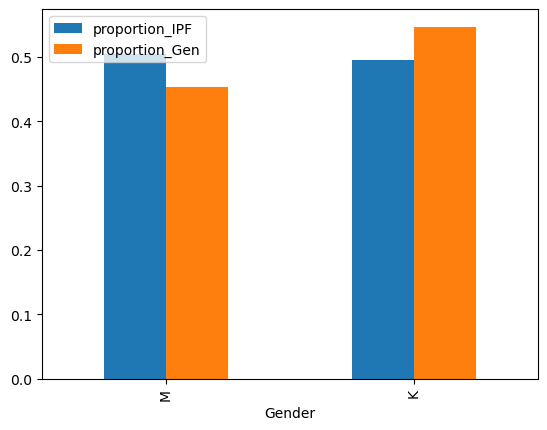

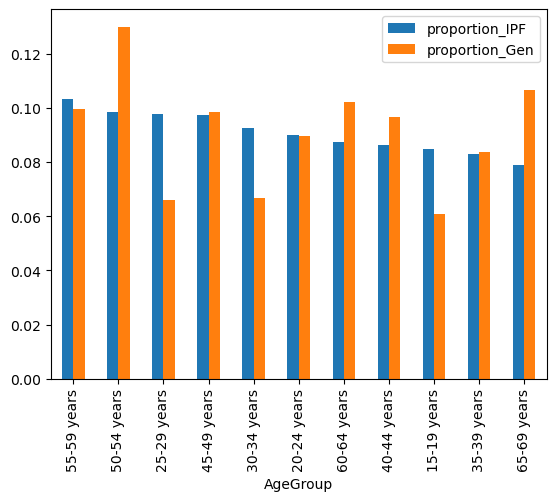

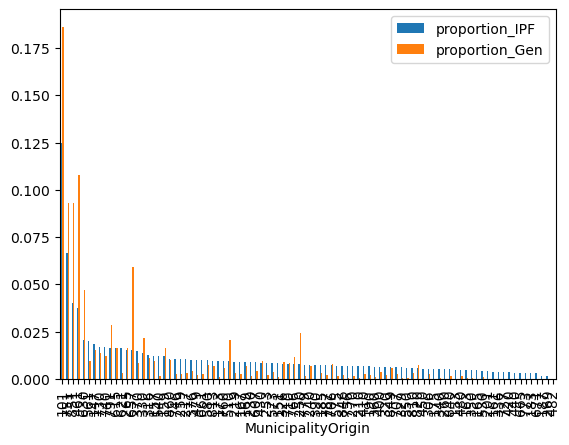

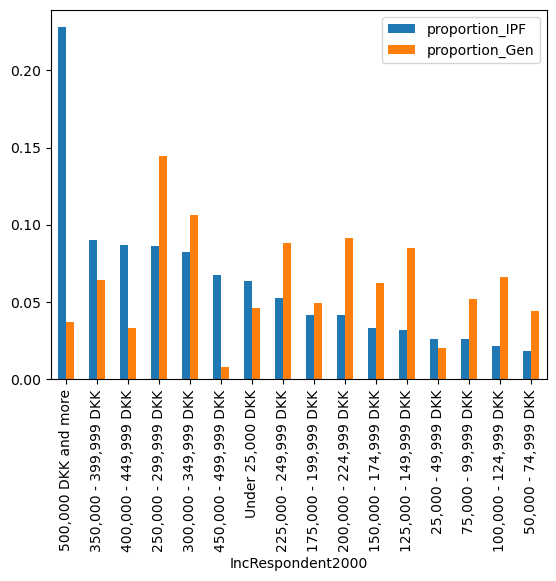

In [20]:
plotIPF(samp_df, df, dimensions)

In [21]:
n=5000000

income['total'] = income['total']/income['total'].sum()

ag1 = income.groupby(['MunicipalityOrigin'])['total'].sum()*n
ag2 = income.groupby(['Gender'])['total'].sum()*n

dimensions = [['MunicipalityOrigin'],['Gender']]
aggregates = [ag1, ag2]
df2 = genPopIPF(samp_df, dimensions, aggregates)
df2.head()

,HomeAdrDistNearestStation,IncFamily2000,IncHouseh2000,HwDayspW,WorkHoursPw,FamNumAdults,FamNumPers,HousehCarOwnership,HousehNumAdults,HousehNumcars,...,WorkHourType,Sector,PopSocio,DayStartGMMzone,HomeAdrGMMzone,JstartGMMzone,PrimOccGMMzone,SduGMMzone,RespHasRejsekort,RespIsmemCarshare
0,"(-0.001, 0.4]","(568.0, 616.0]","(577.0, 631.0]","(4.0, 5.0]","(45.0, 168.0]","(3.0, 11.0]","(3.0, 4.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 1.0]",...,MISSING,IT and information service activities,1,103172.0,103172.0,103172.0,102141.0,147161.0,2.0,2.0
1,"(-0.001, 0.4]","(688.0, 813.0]","(711.0, 811.0]","(4.0, 5.0]","(34.0, 37.0]","(1.0, 2.0]","(2.0, 3.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,1.0,Wholesale and retail trade,1,103172.0,103172.0,103172.0,102141.0,147161.0,1.0,2.0
2,"(0.5, 0.7]","(371.429, 427.0]","(386.0, 443.0]","(3.0, 4.0]","(-0.001, 30.0]","(1.0, 2.0]","(0.999, 2.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,0,Financial and insurance,1,147161.0,103174.0,MISSING,MISSING,MISSING,10.0,2.0
3,"(-0.001, 0.4]","(320.0, 371.429]","(331.0, 386.0]","(4.0, 5.0]","(34.0, 37.0]","(-0.001, 1.0]","(0.999, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,1.0,IT and information service activities,1,147161.0,147161.0,147161.0,102142.0,103172.0,10.0,2.0
4,"(0.9, 1.1]","(-0.001, 112.0]","(-0.001, 123.0]","(-0.001, 3.0]","(-0.001, 30.0]","(2.0, 3.0]","(2.0, 3.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 1.0]",...,0,Activity not stated,0,751441.0,851365.0,MISSING,MISSING,MISSING,20.0,2.0


In [22]:
n=5000000
data = {'K': 0.30, 'M': 0.70}
ag1 = pd.Series(data, name='total')
ag1.index.name = 'Gender'
ag1 = ag1*n
ag2 = income.groupby(['MunicipalityOrigin'])['total'].sum()*n
ag3 = income.groupby(['AgeGroup'])['total'].sum()*n
ag4 = income.groupby(['IncRespondent2000'])['total'].sum()*n

dimensions = [['Gender'],['MunicipalityOrigin'],['AgeGroup'],['IncRespondent2000']]
aggregates = [ag1, ag2, ag3, ag4]
df3 = genPopIPF(samp_df, dimensions, aggregates)
df3.head()

,HomeAdrDistNearestStation,IncFamily2000,IncHouseh2000,HwDayspW,WorkHoursPw,FamNumAdults,FamNumPers,HousehCarOwnership,HousehNumAdults,HousehNumcars,...,WorkHourType,Sector,PopSocio,DayStartGMMzone,HomeAdrGMMzone,JstartGMMzone,PrimOccGMMzone,SduGMMzone,RespHasRejsekort,RespIsmemCarshare
0,"(0.5, 0.7]","(-0.001, 112.0]","(-0.001, 123.0]","(-0.001, 3.0]","(-0.001, 30.0]","(-0.001, 1.0]","(0.999, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0,Activity not stated,3,851761.0,851761.0,MISSING,MISSING,MISSING,5.0,1.0
1,"(-0.001, 0.4]","(-0.001, 112.0]","(-0.001, 123.0]","(4.0, 5.0]","(-0.001, 30.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0,Wholesale and retail trade,0,103172.0,147161.0,147161.0,MISSING,MISSING,1.0,1.0
2,"(1.1, 1.4]","(-0.001, 112.0]","(-0.001, 123.0]","(-0.001, 3.0]","(-0.001, 30.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0,Activity not stated,0,851365.0,103174.0,MISSING,MISSING,MISSING,1.0,1.0
3,"(-0.001, 0.4]","(221.0, 268.0]","(234.0, 280.0]","(4.0, 5.0]","(-0.001, 30.0]","(1.0, 2.0]","(2.0, 3.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]",...,0,Activity not stated,0,103172.0,103172.0,MISSING,MISSING,MISSING,5.0,2.0
4,"(-0.001, 0.4]","(-0.001, 112.0]","(-0.001, 123.0]","(4.0, 5.0]","(-0.001, 30.0]","(2.0, 3.0]","(3.0, 4.0]","(-0.001, 1.0]","(2.0, 3.0]","(-0.001, 1.0]",...,0,Activity not stated,0,103172.0,147161.0,MISSING,MISSING,MISSING,35.0,1.0


In [15]:
import os
os.chdir('/home/s212945/snap/snapd-desktop-integration/current/Documents/Thesis/codeSergio/data')

In [16]:
job = pd.read_csv('job.csv')

In [17]:
job.head(100)

,Unnamed: 0,Year,Gender,AgeGroup,Socio,Sector,Municipality,Val
0,0,2017,Women,45-49 years,Self-employed,CM Manufacture of funiture and other manufactu...,Odder,1
1,1,2017,Men,45-49 years,Self-employed,CM Manufacture of funiture and other manufactu...,Odder,3
2,2,2017,Men,50-54 years,Self-employed,CM Manufacture of funiture and other manufactu...,Odder,2
3,3,2017,Men,55-59 years,Self-employed,CM Manufacture of funiture and other manufactu...,Odder,1
4,4,2017,Men,67 years and over,Self-employed,CM Manufacture of funiture and other manufactu...,Odder,1
...,...,...,...,...,...,...,...,...
95,95,2017,Women,30-34 years,Employees - basic level,"E Water supply, sewerage and waste management",Odder,1
96,96,2017,Men,30-34 years,Employees - basic level,"E Water supply, sewerage and waste management",Odder,1
97,97,2017,Men,40-44 years,Employees - basic level,"E Water supply, sewerage and waste management",Odder,1
98,98,2017,Men,45-49 years,Employees - basic level,"E Water supply, sewerage and waste management",Odder,2


In [18]:
pop = pd.read_csv('pop.csv')

In [25]:
pop.loc[pop['Year']==2021]

,Unnamed: 0,Year,Gender,AgeGroup,Sector,PopSocio,edu,Municipality,Val
1632620,1632620,2021,Men,20-24 years,Residential care,Enrolled in education,H10 Primary education,All Denmark,492
1632621,1632621,2021,Women,25-29 years,Residential care,Enrolled in education,H10 Primary education,All Denmark,1449
1632622,1632622,2021,Men,25-29 years,Residential care,Enrolled in education,H10 Primary education,All Denmark,329
1632623,1632623,2021,Women,30-34 years,Residential care,Enrolled in education,H10 Primary education,All Denmark,826
1632624,1632624,2021,Men,30-34 years,Residential care,Enrolled in education,H10 Primary education,All Denmark,181
...,...,...,...,...,...,...,...,...,...
3340617,3340617,2021,Men,25-29 years,Accommodation and food service activities,Employed,H50 Vocational bachelors educations,Hjørring,2
3340618,3340618,2021,Women,30-34 years,Accommodation and food service activities,Employed,H50 Vocational bachelors educations,Hjørring,5
3340619,3340619,2021,Men,30-34 years,Accommodation and food service activities,Employed,H50 Vocational bachelors educations,Hjørring,3
3340620,3340620,2021,Women,35-39 years,Accommodation and food service activities,Employed,H50 Vocational bachelors educations,Hjørring,2
